## Steps performed on case study

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [116]:
# import required libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the data set

In [3]:
# read data
churn = pd.read_csv("telecom_churn_data.csv")

In [4]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
churn.shape

(99999, 226)

In [6]:
churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

As observed, there are 99999 rows and 226 columns in the dataset.

In [7]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
#Differentiating columns based upon type
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

print('Number of ID columns: {0}'.format(len(id_cols)))
print('Number of Date columns: {0}'.format(len(date_cols)))
print('Number of Category columns: {0}'.format(len(cat_cols)))
print('Number of Numercical columns: {0}'.format(len(num_cols)))
print('Total columns in dataset: {0}'.format(churn.shape[1]))

Number of ID columns: 2
Number of Date columns: 12
Number of Category columns: 8
Number of Numercical columns: 204
Total columns in dataset: 226


## Missing values inspection

In [9]:
#Percentage of missing values column-wise
round(churn.isnull().sum()*100/churn.shape[0], 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Imputing null values

In [10]:
#Recharge related columns
recharge_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
                 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
                 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
                 ]

churn[recharge_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000


In [11]:
churn[recharge_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
date_of_last_rech_6    1607
date_of_last_rech_7    1767
date_of_last_rech_8    3622
date_of_last_rech_9    4760
last_day_rch_amt_6        0
last_day_rch_amt_7        0
last_day_rch_amt_8        0
last_day_rch_amt_9        0
dtype: int64

In [12]:
# Getting the recharge amount for which recharge date is not present
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_6.isnull(), 
                         ['total_rech_num_6', 'date_of_last_rech_6']].count()

total_rech_num_6       1607
date_of_last_rech_6       0
dtype: int64

In [13]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_7.isnull(), 
                         ['total_rech_num_7', 'date_of_last_rech_7']].count()

total_rech_num_7       1767
date_of_last_rech_7       0
dtype: int64

In [14]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_8.isnull(), 
                         ['total_rech_num_8', 'date_of_last_rech_8']].count()

total_rech_num_8       3622
date_of_last_rech_8       0
dtype: int64

In [15]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_9.isnull(), 
                         ['total_rech_num_9', 'date_of_last_rech_9']].count()

total_rech_num_9       4760
date_of_last_rech_9       0
dtype: int64

### Replacing NaN in categorical columns

In [16]:
# replacing Nan in categorical columns with new category 'Not present'
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna('-1'))

In [17]:
round(churn[cat_cols].isnull().sum() * 100 / churn.shape[0], 2)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

### Dropping columns with high percentage of missing

In [18]:
#dropping columns with more than 50% missing values
MISSING_THRESHOLD = 0.5
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))
churn = churn.loc[:, include_cols]
churn.shape

(99999, 194)

In [19]:
include_cols.count(False)

32

### Dropping ID and Date columns

In [20]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'
            ]
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape after dropping:  (99999, 184)


### Imputing using IterativeImputer

In [21]:
dropped_cols = ['max_rech_data_9', 'count_rech_2g_6', 'max_rech_data_6', 'av_rech_amt_data_7', 'count_rech_3g_7', 
                'arpu_3g_9', 'total_rech_data_8', 'arpu_2g_9', 'arpu_2g_8', 'count_rech_3g_8', 'count_rech_3g_9', 
                'total_rech_data_6', 'arpu_3g_8', 'max_rech_data_8', 'arpu_3g_6', 'count_rech_2g_8', 'arpu_2g_6', 
                'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'total_rech_data_9', 'count_rech_2g_7', 
                'av_rech_amt_data_9', 'av_rech_amt_data_6', 'arpu_3g_7', 'count_rech_2g_9', 'av_rech_amt_data_8', 
                'count_rech_3g_6']
num_cols = [x for x in num_cols if x not in dropped_cols]
churn[num_cols].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,4

In [22]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [23]:
churn_cols = churn.columns
imputer = IterativeImputer(max_iter = 2, random_state = 10)
df_stg = churn.copy()
churn_imputed = imputer.fit_transform(df_stg)

In [24]:
# convert imputed numpy array to pandas dataframe
churn_filtered = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn_filtered.isnull().sum()*100/churn_filtered.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [ ]:
temp = churn_filtered.copy()

In [67]:
churn_filtered = temp.copy()

## High-value customers

In [68]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 184 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   arpu_9              float64
 7   onnet_mou_6         float64
 8   onnet_mou_7         float64
 9   onnet_mou_8         float64
 10  onnet_mou_9         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  offnet_mou_9        float64
 15  roam_ic_mou_6       float64
 16  roam_ic_mou_7       float64
 17  roam_ic_mou_8       float64
 18  roam_ic_mou_9       float64
 19  roam_og_mou_6       float64
 20  roam_og_mou_7       float64
 21  roam_og_mou_8       float64
 22  roam_og_mou_9       float64
 23  loc_og_t2t_mou_6    float64
 24  loc_og_t2t_mou_7    float64

In [69]:
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-114.92492,-68.990755,0.00,-116.744469,172.317477,149.122203,0.00,148.190194,43.7639,26.962613,0.00,27.857573,16.424756,0.731396,0.00,-2.866808,-64.854889,-81.574812,0.00,-88.031048,93.341867,91.394768,0.00,90.449234,3.750278,3.799578,0.00,3.662679,1.965415,-5.280009,0.00,-0.816935,4.689373,-16.084158,0.00,-17.345618,44.202895,45.214534,0.00,45.502586,87.368959,90.802851,0.00,86.197968,1.087902,1.14843,0.00,1.082159,0.0,0.0,0.0,0.0,121.3785,126.502797,0.00,123.713578,-114.755534,-104.200121,0.0,-94.908964,3.911629,4.974262,0.00,4.404641,0.444325,0.046437,0.0,0.049656,0.00,0.00,0.00,0.00,-43.808638,-50.557003,0.16,-45.917765,107.482179,107.116677,4.13,106.154347,12.075557,12.604028,1.15,12.172418,62.941976,57.721974,5.44,61.64441,-18.460668,-19.422445,0.00,-18.59149,20.721929,21.646592,0.00,19.618126,2.156614,2.22448,0.00,2.176195,0.0,0.0,0.0,0.0,0.44571,1.142461,0.00,0.106303,0.00,0.00,5.44,0.00,-67.039104,-64.308488,0.0,-66.835169,7.80566,8.133751,0.0,8.084702,0.853943,1.012057,0.0,1.017388,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.3

In [70]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_filtered['avg_rech_amt_6_7'] = (churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7) / 2
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-114.92492,-68.990755,0.00,-116.744469,172.317477,149.122203,0.00,148.190194,43.7639,26.962613,0.00,27.857573,16.424756,0.731396,0.00,-2.866808,-64.854889,-81.574812,0.00,-88.031048,93.341867,91.394768,0.00,90.449234,3.750278,3.799578,0.00,3.662679,1.965415,-5.280009,0.00,-0.816935,4.689373,-16.084158,0.00,-17.345618,44.202895,45.214534,0.00,45.502586,87.368959,90.802851,0.00,86.197968,1.087902,1.14843,0.00,1.082159,0.0,0.0,0.0,0.0,121.3785,126.502797,0.00,123.713578,-114.755534,-104.200121,0.0,-94.908964,3.911629,4.974262,0.00,4.404641,0.444325,0.046437,0.0,0.049656,0.00,0.00,0.00,0.00,-43.808638,-50.557003,0.16,-45.917765,107.482179,107.116677,4.13,106.154347,12.075557,12.604028,1.15,12.172418,62.941976,57.721974,5.44,61.64441,-18.460668,-19.422445,0.00,-18.59149,20.721929,21.646592,0.00,19.618126,2.156614,2.22448,0.00,2.176195,0.0,0.0,0.0,0.0,0.44571,1.142461,0.00,0.106303,0.00,0.00,5.44,0.00,-67.039104,-64.308488,0.0,-66.835169,7.80566,8.133751,0.0,8.084702,0.853943,1.012057,0.0,1.017388,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58,307.0
1,0.0,0.0,0

In [71]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn_filtered.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 368.5


In [72]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn_filtered.loc[churn_filtered.avg_rech_amt_6_7 >= churn_filtered.avg_rech_amt_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30011, 185)

In [73]:
churn_filtered = churn_filtered.drop('avg_rech_amt_6_7', axis = 1)
churn_filtered.shape

(30011, 184)

#### As observed, after filteration, we are left with 30011 rows and 185 columns

## Deriving churn value

In [74]:
#Calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [75]:
#Calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [76]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_calls_mou_9,total_internet_mb_9,churn
0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,-117.035252,453.43,567.16,325.91,149.210536,16.23,33.49,31.64,42.479069,23.74,12.59,38.06,-5.533838,51.39,31.38,40.28,-88.03609,308.63,447.38,162.28,90.449878,62.13,55.14,53.23,3.662689,0.0,0.0,0.00,-2.163478,422.16,533.91,255.79,-17.345868,4.30,23.29,12.01,45.497136,49.89,31.76,49.14,86.198184,6.66,20.08,16.68,1.082794,0.0,0.0,0.0,0.0,60.86,75.14,77.84,123.710153,0.0,0.18,10.01,-94.907453,4.50,0.00,6.50,4.40465,0.00,0.0,0.0,0.049656,487.53,609.24,350.16,0.00,58.14,32.26,27.31,-45.930474,217.56,221.49,121.19,106.154339,152.16,101.46,39.53,12.172258,427.88,355.23,188.04,61.637544,36.89,11.83,30.39,-18.60057,91.44,126.99,141.33,19.618189,52.19,34.24,22.21,2.17609,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.105001,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-66.837432,2.06,14.53,31.59,8.084656,15.74,15.19,15.14,1.017411,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,0.0,0.00,0.0,1
1,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0

In [77]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [78]:
# print churn ratio
print('Churn class')
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn class
0    91.359835
1     8.640165
Name: churn, dtype: float64


#### As observed, there is high class imbalance in churning. There is a 91:9 ratio

## Delete columns that are related to 9th month

In [79]:
# delete all features relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30011, 141)

## Updating the categorical and numerical columns

In [80]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns
print(col_9_names)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')


In [81]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

print('Categorical columns: ')
print(cat_cols)
print()
print('Numerical columns: ')
print(num_cols)

Categorical columns: 
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

Numerical columns: 
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', '

In [82]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [83]:
churn_filtered.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 141 columns):
 #   Column              Dtype   
---  ------              -----   
 0   loc_og_t2o_mou      float64 
 1   std_og_t2o_mou      float64 
 2   loc_ic_t2o_mou      float64 
 3   arpu_6              float64 
 4   arpu_7              float64 
 5   arpu_8              float64 
 6   onnet_mou_6         float64 
 7   onnet_mou_7         float64 
 8   onnet_mou_8         float64 
 9   offnet_mou_6        float64 
 10  offnet_mou_7        float64 
 11  offnet_mou_8        float64 
 12  roam_ic_mou_6       float64 
 13  roam_ic_mou_7       float64 
 14  roam_ic_mou_8       float64 
 15  roam_og_mou_6       float64 
 16  roam_og_mou_7       float64 
 17  roam_og_mou_8       float64 
 18  loc_og_t2t_mou_6    float64 
 19  loc_og_t2t_mou_7    float64 
 20  loc_og_t2t_mou_8    float64 
 21  loc_og_t2m_mou_6    float64 
 22  loc_og_t2m_mou_7    float64 
 23  loc_og_t2m_mou_8    float64 
 24  l

## New variables derivation

Since 8th month is the deciding month for the customer whether he will churn or not, let's try to find some differences between recharge and daat usage by the customer. We will calculate difference in behavior for all different types of column

In [84]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_t2t_mou_diff'] = churn_filtered.loc_og_t2t_mou_8 - ((churn_filtered.loc_og_t2t_mou_6 + churn_filtered.loc_og_t2t_mou_6)/2)

churn_filtered['loc_og_t2m_mou_diff'] = churn_filtered.loc_og_t2m_mou_8 - ((churn_filtered.loc_og_t2m_mou_6 + churn_filtered.loc_og_t2m_mou_6)/2)

churn_filtered['loc_og_t2f_mou_diff'] = churn_filtered.loc_og_t2f_mou_8 - ((churn_filtered.loc_og_t2f_mou_6 + churn_filtered.loc_og_t2f_mou_6)/2)

churn_filtered['loc_og_t2c_mou_diff'] = churn_filtered.loc_og_t2c_mou_8 - ((churn_filtered.loc_og_t2c_mou_6 + churn_filtered.loc_og_t2c_mou_6)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_t2t_mou_diff'] = churn_filtered.std_og_t2t_mou_8 - ((churn_filtered.std_og_t2t_mou_6 + churn_filtered.std_og_t2t_mou_7)/2)

churn_filtered['std_og_t2m_mou_diff'] = churn_filtered.std_og_t2m_mou_8 - ((churn_filtered.std_og_t2m_mou_6 + churn_filtered.std_og_t2m_mou_7)/2)

churn_filtered['std_og_t2f_mou_diff'] = churn_filtered.std_og_t2f_mou_8 - ((churn_filtered.std_og_t2f_mou_6 + churn_filtered.std_og_t2f_mou_7)/2)

churn_filtered['std_og_t2c_mou_diff'] = churn_filtered.std_og_t2c_mou_8 - ((churn_filtered.std_og_t2c_mou_6 + churn_filtered.std_og_t2c_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['og_others_diff'] = churn_filtered.og_others_8 - ((churn_filtered.og_others_6 + churn_filtered.og_others_8)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_t2t_mou_diff'] = churn_filtered.loc_ic_t2t_mou_8 - ((churn_filtered.loc_ic_t2t_mou_6 + churn_filtered.loc_ic_t2t_mou_7)/2)

churn_filtered['loc_ic_t2m_mou_diff'] = churn_filtered.loc_ic_t2m_mou_8 - ((churn_filtered.loc_ic_t2m_mou_6 + churn_filtered.loc_ic_t2m_mou_7)/2)

churn_filtered['loc_ic_t2f_mou_diff'] = churn_filtered.loc_ic_t2f_mou_8 - ((churn_filtered.loc_ic_t2f_mou_6 + churn_filtered.loc_ic_t2f_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_t2t_mou_diff'] = churn_filtered.std_ic_t2t_mou_8 - ((churn_filtered.std_ic_t2t_mou_6 + churn_filtered.std_ic_t2t_mou_7)/2)

churn_filtered['std_ic_t2m_mou_diff'] = churn_filtered.std_ic_t2m_mou_8 - ((churn_filtered.std_ic_t2m_mou_6 + churn_filtered.std_ic_t2m_mou_7)/2)

churn_filtered['std_ic_t2f_mou_diff'] = churn_filtered.std_ic_t2f_mou_8 - ((churn_filtered.std_ic_t2f_mou_6 + churn_filtered.std_ic_t2f_mou_7)/2)

churn_filtered['std_ic_t2o_mou_diff'] = churn_filtered.std_ic_t2o_mou_8 - ((churn_filtered.std_ic_t2o_mou_6 + churn_filtered.std_ic_t2o_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['ic_others_diff'] = churn_filtered.ic_others_8 - ((churn_filtered.ic_others_6 + churn_filtered.ic_others_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['last_day_rch_amt_diff'] = churn_filtered.last_day_rch_amt_8 - ((churn_filtered.last_day_rch_amt_6 + churn_filtered.last_day_rch_amt_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

churn_filtered['monthly_2g_diff'] = churn_filtered.monthly_2g_8 - ((churn_filtered.monthly_2g_6 + churn_filtered.monthly_2g_7)/2)

churn_filtered['sachet_2g_diff'] = churn_filtered.sachet_2g_8 - ((churn_filtered.sachet_2g_6 + churn_filtered.sachet_2g_7)/2)

churn_filtered['monthly_3g_diff'] = churn_filtered.monthly_3g_8 - ((churn_filtered.monthly_3g_6 + churn_filtered.monthly_3g_7)/2)

churn_filtered['sachet_3g_diff'] = churn_filtered.sachet_3g_8 - ((churn_filtered.sachet_3g_6 + churn_filtered.sachet_3g_6)/2)


In [85]:
churn_filtered.shape

(30011, 183)

## Remove columns with no variance

In [86]:
for col in churn_filtered.columns:
    if churn_filtered[col].nunique() == 1:
        print("Column", col ,"has no variance and contains only ", churn_filtered[col].nunique()," unique value")
        print("Dropping the column", col)
        print()
        churn_filtered.drop(col, axis = 1, inplace = True)

print("Shape of the updated dataset:", churn_filtered.shape)

Column loc_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_8

Column std_ic_t2o_mou_6 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_7

Column std_ic_t2o_mou_8 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mo

## Remove highly correlated columns

In [87]:
#Selecting columns which have absolute correlation greater than 60%
# Create correlation matrix
corr_matrix = churn_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Drop features 
churn_filtered.drop(to_drop, axis = 1, inplace = True)

In [88]:
churn_filtered.shape

(30011, 76)

## Updating the category and numerical columns

In [89]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [90]:
cat_cols = churn_filtered.select_dtypes('category').columns
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

## Exploratory data analysis

### Univariate

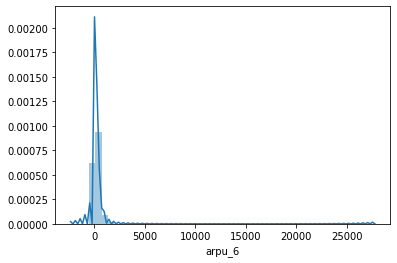

In [91]:
sns.distplot(churn.arpu_6)

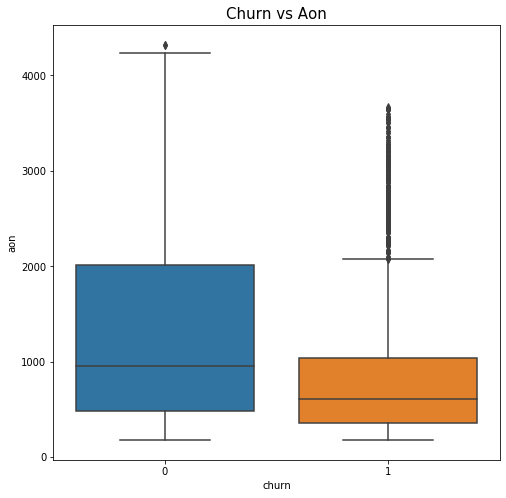

In [92]:
plt.figure(figsize = [8,8])
plt.title('Churn vs Aon', fontsize = 15)
sns.boxplot(x = churn_filtered.churn, y = churn_filtered.aon)
plt.show()

## Treating outliers using IQR

In [93]:
for col in num_cols:
    Q1 = churn_filtered[col].quantile(0.25)
    Q3 = churn_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    if(len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)]) > 0 
       or len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)]) > 0):
        print('Found outliers in column: ' + col)
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR
        print('Capped outliers in column "' + col + '" using IQR method' )

Found outliers in column: arpu_6
Capped outliers in column "arpu_6" using IQR method
Found outliers in column: onnet_mou_6
Capped outliers in column "onnet_mou_6" using IQR method
Found outliers in column: roam_ic_mou_6
Capped outliers in column "roam_ic_mou_6" using IQR method


# Modelling

In [94]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   arpu_6               30011 non-null  float64 
 1   onnet_mou_6          30011 non-null  float64 
 2   offnet_mou_6         30011 non-null  float64 
 3   roam_ic_mou_6        30011 non-null  float64 
 4   roam_ic_mou_7        30011 non-null  float64 
 5   roam_og_mou_8        30011 non-null  float64 
 6   loc_og_t2t_mou_6     30011 non-null  float64 
 7   loc_og_t2m_mou_6     30011 non-null  float64 
 8   loc_og_t2f_mou_6     30011 non-null  float64 
 9   loc_og_t2c_mou_6     30011 non-null  float64 
 10  loc_og_t2c_mou_7     30011 non-null  float64 
 11  loc_og_t2c_mou_8     30011 non-null  float64 
 12  std_og_t2f_mou_6     30011 non-null  float64 
 13  isd_og_mou_6         30011 non-null  float64 
 14  spl_og_mou_6         30011 non-null  float64 
 15  spl_og_mou_7       

In [95]:
churn_filtered.isnull().sum()

arpu_6                 0
onnet_mou_6            0
offnet_mou_6           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2m_mou_6       0
loc_og_t2f_mou_6       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
std_og_t2f_mou_6       0
isd_og_mou_6           0
spl_og_mou_6           0
spl_og_mou_7           0
spl_og_mou_8           0
og_others_6            0
og_others_7            0
og_others_8            0
loc_ic_t2t_mou_6       0
loc_ic_t2m_mou_6       0
loc_ic_t2f_mou_6       0
std_ic_t2t_mou_6       0
std_ic_t2m_mou_6       0
std_ic_t2f_mou_6       0
spl_ic_mou_6           0
spl_ic_mou_7           0
spl_ic_mou_8           0
isd_ic_mou_6           0
ic_others_6            0
total_rech_num_6       0
max_rech_amt_6         0
max_rech_amt_7         0
max_rech_amt_8         0
vol_2g_mb_6            0
vol_3g_mb_6            0
night_pck_user_6       0
night_pck_user_7       0
night_pck_user_8       0


### Dummification of categorical columns

In [96]:
cat_cols = churn_filtered.select_dtypes('category').columns
print(cat_cols)

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')


In [97]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVariables = pd.get_dummies(churn_filtered[cat_cols], drop_first=True)


In [98]:
# Adding the results to the master dataframe
churn_filtered = pd.concat([churn_filtered, dummyVariables], axis=1)


In [99]:
churn_filtered.drop(cat_cols, axis=1, inplace=True)

In [100]:
churn_filtered.shape

(30011, 82)

### Train-test split

In [101]:
#Splitting the dataframe to 70% train and 30% test
df_train, df_test = train_test_split(churn_filtered, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(21007, 82)
(9004, 82)


In [102]:
y_train = df_train['churn']
X_train = df_train.drop('churn', axis = 1)

In [103]:
y_test = df_test['churn']
X_test = df_test.drop('churn', axis = 1)

## Scaling

In [105]:
# scaling 
scaler = MinMaxScaler()
num_cols.remove('churn')
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_3g_6,aon,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
1434,0.0,0.064562,0.018528,0.013235,0.014829,0.001033,0.010142,0.000351,0.000000,0.033130,0.024912,0.035798,0.0,0.019080,0.031499,0.005728,0.002107,0.0,0.0,0.0,0.007185,0.001977,0.000000,0.016365,0.008954,0.0,0.774083,0.750933,0.980479,0.000000,0.000000,0.061889,0.007481,0.017456,0.011238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041798,0.000000,0.263083,0.452060,0.358884,0.398732,0.320936,0.425284,0.577995,0.722786,0.517491,0.446251,0.456481,0.471766,0.465542,0.478628,0.383475,0.307148,0.517611,0.543165,0.437850,0.362044,0.441836,0.461538,0.485714,0.535714,0.393939,0,0,1,0,0,0,0,0,0,1,0,0
4636,0.0,0.034501,0.026411,0.013235,0.014829,0.001033,0.026932,0.040617,0.015511,0.006888,0.024912,0.035798,0.0,0.019080,0.005864,0.002354,0.002538,0.0,0.0,0.0,0.009978,0.102547,0.056399,0.004056,0.000000,0.0,0.772355,0.750933,0.980479,0.002020,0.000000,0.016287,0.027431,0.049377,0.044504,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.216477,0.004797,0.267977,0.459668,0.360128,0.398732,0.320936,0.426455,0.567215,0.739004,0.517491,0.449941,0.436933,0.523235,0.465961,0.468434,0.383421,0.307275,0.517611,0.519784,0.444250,0.373965,0.448610,0.538462,0.495238,0.535714,0.393939,0,0,1,0,1,0,0,0,0,1,0,1
17998,0.0,0.023355,0.024707,0.013235,0.014829,0.001033,0.014018,0.042785,0.002899,0.006888,0.024912,0.035798,0.0,0.019214,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.011459,0.022794,0.001061,0.003371,0.000864,0.0,0.772355,0.750933,0.980479,0.110823,0.000000,0.039088,0.007481,0.029925,0.011238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.507852,0.000000,0.265140,0.456900,0.362107,0.398732,0.320936,0.429730,0.605236,0.721449,0.517491,0.446812,0.456603,0.470730,0.466498,0.468077,0.383475,0.283662,0.517611,0.534173,0.434213,0.370292,0.441836,0.461538,0.495238,0.535714,0.393939,0,0,0,0,0,0,0,0,0,0,0,0
18683,0.0,0.043397,0.076686,0.013235,0.014829,0.001033,0.037238,0.035829,0.000225,0.006888,0.024912,0.035798,0.0,0.019080,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.007421,0.006877,0.004087,0.003569,0.021541,0.0,0.772355,0.750933,0.980479,0.002083,0.000000,0.048860,0.011721,0.011721,0.010564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587823,0.000000,0.264962,0.438034,0.369808,0.398732,0.320936,0.418390,0.570585,0.722836,0.517491,0.446561,0.456632,0.467152,0.467777,0.464202,0.384427,0.306373,0.517611,0.530576,0.437850,0.370292,0.441836,0.461538,0.495238,0.535714,0.393939,0,0,0,0,0,0,0,0,0,0,0,0
26470,0.0,0.035577,0.056893,0.013235,0.014829,0.001033,0.013659,0.049170,0.000000,0.006888,0.024912,0.035798,0.0,0.019080,0.000000,0.000000,0.000022,0.0,0.0,0.0,0.011865,0.032594,0.000882,0.003377,0.013852,0.0,0.779268,0.750933,0.988226,0.000000,0.000074,0.094463,0.007481,0.007481,0.006743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062576,0.000000,0.244868,0.444469,0.349654,0.398732,0.320936,0.424218,0.559323,

## Logistic Regression Model using RFE

In [106]:
# using sklearn 
logreg = LogisticRegression(class_weight='balanced')

In [107]:
X_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_3g_6,aon,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
count,21007.0,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.0,0.059108,0.050092,0.020228,0.018510,0.007335,0.024467,0.038643,0.004834,0.011362,0.028694,0.041482,0.005559,0.019236,0.005794,0.005929,0.005051,0.006897,0.000151,0.000198,0.017577,0.034471,0.009355,0.006280,0.006901,0.002125,0.764418,0.743147,0.949599,0.002841,0.000916,0.039485,0.043003,0.044054,0.036769,0.012721,0.009569,0.031549,0.026077,0.022735,0.012769,0.004752,0.263243,0.002451,0.261231,0.451424,0.358007,0.398463,0.320020,0.423830,0.576488,0.722585,0.517010,0.445994,0.457752,0.471190,0.466207,0.468207,0.383337,0.307146,0.517467,0.524250,0.436255,0.369636,0.441977,0.459290,0.496641,0.535492,0.394018,0.370543,0.010616,0.378160,0.010092,0.384015,0.009473,0.038939,0.342219,0.043652,0.344599,0.064598,0.328890
std,0.0,0.061457,0.056202,0.030966,0.021173,0.029660,0.036627,0.053349,0.016042,0.018964,0.018341,0.022061,0.033349,0.008025,0.018385,0.019018,0.016529,0.022622,0.008701,0.010005,0.025054,0.047977,0.027256,0.014820,0.021431,0.014768,0.081690,0.077189,0.172498,0.017260,0.011433,0.031312,0.044569,0.046242,0.039387,0.043822,0.031197,0.094390,0.077766,0.071817,0.043488,0.030930,0.235928,0.018528,0.019844,0.028539,0.018417,0.018015,0.021766,0.016995,0.026455,0.008992,0.017003,0.015923,0.025482,0.015115,0.010244,0.013731,0.009073,0.010594,0.011485,0.025338,0.020289,0.017351,0.020629,0.047631,0.027236,0.031722,0.014525,0.482962,0.102486,0.484939,0.099953,0.486373,0.096870,0.193455,0.474464,0.204325,0.475249,0.245820,0.469821
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 1434 to 5640
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   arpu_6                21007 non-null  float64
 1   onnet_mou_6           21007 non-null  float64
 2   offnet_mou_6          21007 non-null  float64
 3   roam_ic_mou_6         21007 non-null  float64
 4   roam_ic_mou_7         21007 non-null  float64
 5   roam_og_mou_8         21007 non-null  float64
 6   loc_og_t2t_mou_6      21007 non-null  float64
 7   loc_og_t2m_mou_6      21007 non-null  float64
 8   loc_og_t2f_mou_6      21007 non-null  float64
 9   loc_og_t2c_mou_6      21007 non-null  float64
 10  loc_og_t2c_mou_7      21007 non-null  float64
 11  loc_og_t2c_mou_8      21007 non-null  float64
 12  std_og_t2f_mou_6      21007 non-null  float64
 13  isd_og_mou_6          21007 non-null  float64
 14  spl_og_mou_6          21007 non-null  float64
 15  spl_og_mou_7     

In [109]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
## list columns that rfe predicted as useful
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 67),
 ('onnet_mou_6', False, 58),
 ('offnet_mou_6', False, 55),
 ('roam_ic_mou_6', False, 37),
 ('roam_ic_mou_7', False, 6),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 29),
 ('loc_og_t2c_mou_6', False, 42),
 ('loc_og_t2c_mou_7', False, 17),
 ('loc_og_t2c_mou_8', False, 56),
 ('std_og_t2f_mou_6', False, 21),
 ('isd_og_mou_6', False, 34),
 ('spl_og_mou_6', False, 49),
 ('spl_og_mou_7', False, 43),
 ('spl_og_mou_8', False, 15),
 ('og_others_6', False, 23),
 ('og_others_7', False, 33),
 ('og_others_8', False, 38),
 ('loc_ic_t2t_mou_6', True, 1),
 ('loc_ic_t2m_mou_6', False, 2),
 ('loc_ic_t2f_mou_6', False, 5),
 ('std_ic_t2t_mou_6', False, 36),
 ('std_ic_t2m_mou_6', False, 24),
 ('std_ic_t2f_mou_6', False, 30),
 ('spl_ic_mou_6', False, 16),
 ('spl_ic_mou_7', False, 32),
 ('spl_ic_mou_8', False, 9),
 ('isd_ic_mou_6', False, 19),
 ('ic_others_6', False, 41),
 ('total_rech_num_6', False, 11),
 ('m

In [111]:
# get supported columns from RFE
col = X_train.columns[rfe.support_]

### Assessing the model with StatsModels

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4303.4
Date:                Tue, 25 Aug 2020   Deviance:                       8606.9
Time:                        00:14:02   Pearson chi2:                 2.86e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 127.8610      4.098     31.202      0.000     119.829     135.893
roam_og_mou_8           6.4101      0.715      8.959      0.000       5.008       7.812
loc_og_t2t_mou_6      -92.8543      5.404    -17.184      0.000    -103.445     -82.264
loc_og_t2m_mou_6       -9.8248      1.494     -6.577      0.000     -12.752      -6.897
loc_ic_t2t_mou_6      -34.2691      4.541     -7.546      0.000     -43.170     -25.368
monthly_2g_8           -6.8654      0.971     -7.071      0.000      -8.768      -4.963
sep_vbc_3g            -62.2433     14.599     -4.263      0.000     -90.857     -33.629
arpu_diff             -20.1529      2.425     -8.309      0.000     -24.907     -15.399
onnet_mou_diff         -4.1897      1.124     -3.727      0.000      -6.393      -1.986
offnet_mou_diff       -11.2396      1.856     -6.056      0.000     -14.877      -7.602
loc_og_t2t_mou_diff  -173.4213      9.874    -17.564      0.000    -192.773    -154.069
loc_og_t2m_mou_diff    -7.8259      2.788     -2.807      0.005     -13.290      -2.362
loc_ic_t2t_mou_diff   -60.3497      7.016     -8.602      0.000     -74.100     -46.599
loc_ic_t2m_mou_diff    -7.2546      1.319     -5.501      0.000      -9.840      -4.670
std_ic_t2t_mou_diff   -11.9453      2.914     -4.099      0.000     -17.657      -6.233
total_rech_num_diff    -6.7223      1.226     -5.483      0.000      -9.125      -4.319
=======================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,std_ic_t2t_mou_diff,1105.50
9,loc_og_t2t_mou_diff,843.55
11,loc_ic_t2t_mou_diff,841.09
10,loc_og_t2m_mou_diff,792.89
14,total_rech_num_diff,651.99
8,offnet_mou_diff,634.96
7,onnet_mou_diff,423.85
12,loc_ic_t2m_mou_diff,374.70
6,arpu_diff,363.18
2,loc_og_t2m_mou_6,2.08


In [118]:
### drop loc_og_t2m_mou_diff since this has p value greater than expected
col = col.drop('loc_og_t2m_mou_diff', 1)

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4307.7
Date:                Tue, 25 Aug 2020   Deviance:                       8615.4
Time:                        00:21:30   Pearson chi2:                 3.70e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 125.7200      3.988     31.522      0.000     117.903     133.537
roam_og_mou_8           6.6359      0.713      9.307      0.000       5.238       8.033
loc_og_t2t_mou_6      -94.9131      5.409    -17.549      0.000    -105.514     -84.313
loc_og_t2m_mou_6       -6.4047      0.796     -8.047      0.000      -7.965      -4.845
loc_ic_t2t_mou_6      -34.1047      4.560     -7.479      0.000     -43.043     -25.167
monthly_2g_8           -6.8751      0.970     -7.084      0.000      -8.777      -4.973
sep_vbc_3g            -62.7057     14.663     -4.277      0.000     -91.444     -33.967
arpu_diff             -20.5516      2.425     -8.476      0.000     -25.304     -15.799
onnet_mou_diff         -4.3700      1.128     -3.873      0.000      -6.581      -2.159
offnet_mou_diff       -12.1622      1.838     -6.617      0.000     -15.765      -8.560
loc_og_t2t_mou_diff  -177.1975      9.830    -18.026      0.000    -196.464    -157.931
loc_ic_t2t_mou_diff   -59.9659      7.059     -8.495      0.000     -73.801     -46.131
loc_ic_t2m_mou_diff    -8.1054      1.291     -6.276      0.000     -10.637      -5.574
std_ic_t2t_mou_diff   -11.9299      2.924     -4.079      0.000     -17.662      -6.198
total_rech_num_diff    -6.8917      1.232     -5.594      0.000      -9.306      -4.477
=======================================================================================
"""

In [120]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,std_ic_t2t_mou_diff,1062.05
9,loc_og_t2t_mou_diff,832.52
10,loc_ic_t2t_mou_diff,829.24
13,total_rech_num_diff,650.81
8,offnet_mou_diff,577.18
7,onnet_mou_diff,423.50
6,arpu_diff,362.28
11,loc_ic_t2m_mou_diff,338.10
1,loc_og_t2t_mou_6,1.89
3,loc_ic_t2t_mou_6,1.86


In [121]:
### drop loc_og_t2m_mou_diff since this has p value greater than expected
col = col.drop('std_ic_t2t_mou_diff', 1)

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4319.4
Date:                Tue, 25 Aug 2020   Deviance:                       8638.7
Time:                        00:22:13   Pearson chi2:                 5.02e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 121.1023      3.823     31.674      0.000     113.609     128.596
roam_og_mou_8           6.7462      0.712      9.472      0.000       5.350       8.142
loc_og_t2t_mou_6      -97.3017      5.451    -17.851      0.000    -107.985     -86.618
loc_og_t2m_mou_6       -6.3608      0.793     -8.025      0.000      -7.914      -4.807
loc_ic_t2t_mou_6      -32.4159      4.447     -7.289      0.000     -41.132     -23.700
monthly_2g_8           -6.8655      0.970     -7.081      0.000      -8.766      -4.965
sep_vbc_3g            -63.1814     14.769     -4.278      0.000     -92.129     -34.234
arpu_diff             -20.8887      2.422     -8.624      0.000     -25.636     -16.141
onnet_mou_diff         -4.7872      1.124     -4.257      0.000      -6.991      -2.583
offnet_mou_diff       -12.0161      1.834     -6.553      0.000     -15.610      -8.422
loc_og_t2t_mou_diff  -181.0117      9.848    -18.380      0.000    -200.314    -161.709
loc_ic_t2t_mou_diff   -57.7945      6.938     -8.330      0.000     -71.393     -44.196
loc_ic_t2m_mou_diff    -8.1680      1.296     -6.301      0.000     -10.709      -5.627
total_rech_num_diff    -6.9385      1.230     -5.641      0.000      -9.349      -4.528
=======================================================================================
"""

In [123]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_og_t2t_mou_diff,770.66
10,loc_ic_t2t_mou_diff,688.15
12,total_rech_num_diff,627.98
8,offnet_mou_diff,555.67
7,onnet_mou_diff,420.50
6,arpu_diff,356.65
11,loc_ic_t2m_mou_diff,323.30
1,loc_og_t2t_mou_6,1.86
3,loc_ic_t2t_mou_6,1.82
2,loc_og_t2m_mou_6,1.67


## PCA

In [ ]:
#Apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [ ]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [ ]:
#Extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [ ]:
# create pipeline
total_features = 70
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components = total_features)),
         ("logistic", LogisticRegression(class_weight='balanced')) # to handle class imbalance
        ]
pipeline = Pipeline(steps)

In [ ]:
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

### Evalauation on test data

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

## Hyperparameter tuning - PCA and Logistic Regression

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# cross validation results
pd.DataFrame(model.cv_results_)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

## Random Forest

In [ ]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Choosing features

In [ ]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [ ]:
# fit model
rf_model.fit(X_train, y_train)

In [ ]:
# OOB score
rf_model.oob_score_

In [ ]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

## Feature Importance

In [ ]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance